In [1]:
# Generate data for SVM classifier with L1 regularization.
srand(1);
n = 20;
m = 1000;
TEST = m;
DENSITY = 0.2;
beta_true = randn(n,1);
idxs = randperm(n)[1:int((1-DENSITY)*n)];
for idx in idxs
    beta_true[idx] = 0;
end
offset = 0;
sigma = 45;
X = 5 * randn(m, n);
Y = sign(X * beta_true + offset + sigma * randn(m,1));
X_test = 5 * randn(TEST, n);

In [ ]:
# Form SVM with L1 regularization problem.
using Convex, SCS
set_default_solver(SCSSolver(verbose=0));
beta = Variable(n);
v = Variable();
loss = sum(pos(1 - Y .* (X*beta - v)));
reg = norm(beta, 1);

# Compute a trade-off curve and record train and test error.
TRIALS = 100
train_error = zeros(TRIALS);
test_error = zeros(TRIALS);
lambda_vals = logspace(-2, 0, TRIALS);
beta_vals = zeros(length(beta), TRIALS);
for i = 1:TRIALS
    lambda = lambda_vals[i];
    problem = minimize(loss/m + lambda*reg);
    solve!(problem);
    train_error[i] = sum(float(sign(X*beta_true + offset) .!= sign(evaluate(X*beta - v))))/m;
    test_error[i] = sum(float(sign(X_test*beta_true + offset) .!= sign(evaluate(X_test*beta - v))))/TEST;
    beta_vals[:, i] =  evaluate(beta);
end

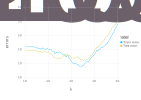

In [3]:
# Plot the train and test error over the trade-off curve.
using Gadfly, DataFrames
df1 = DataFrame(λ=lambda_vals, errors=train_error, label="Train error");
df2 = DataFrame(λ=lambda_vals, errors=test_error, label="Test error");
df = vcat(df1, df2);

plot(df, x="λ", y="errors", color="label", Geom.line,
    Scale.x_log10, Scale.y_log10)

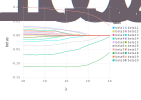

In [4]:
# Plot the regularization path for beta.
df = DataFrame(λ=lambda_vals, betas=vec(beta_vals[1,:]), label="beta1")
for i=2:n
    df = vcat(df, DataFrame(λ=lambda_vals, betas=vec(beta_vals[i,:]), label=string("beta", i)));
end
plot(df, x="λ", y="betas", color="label", Geom.line, Scale.x_log10)